<a href="https://colab.research.google.com/github/injoon-pij/dlnlp-learning/blob/main/dlnlp_keras_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__케라스(Keras)__

* 딥러닝 구현을 도와주는 파이썬 라이브러리

* [케라스 공식 문서](https://keras.io/)

# 1) Preprocessing

* ```Tokenizer()``` :  토큰화와 정수 인코딩(단어에 대한 인덱싱)을 위해 사용됨
 * ```Tokenizer.fit_on_text()``` : 입력된 데이터를 각각 토큰화하고, 전체 단어 집합을 생성함. 이때 단어 집합의 인덱스 순서는 단어 빈도수가 높은 순서와 같음
 * ```Tokenizer.text_to_sequences()``` : 입력된 시퀸스 데이터의 단어들에 대하여 앞서 생성한 단어 집합을 기반으로  정수 인코딩 수행

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
t  = Tokenizer()

fit_text = "The earth is an awesome place live"
t.fit_on_texts([fit_text])

In [ ]:
t.word_index # 단어집합

{'an': 4, 'awesome': 5, 'earth': 2, 'is': 3, 'live': 7, 'place': 6, 'the': 1}

In [ ]:
t.word_counts # 단어집합의 각 단어들의 빈도수

OrderedDict([('the', 1),
             ('earth', 1),
             ('is', 1),
             ('an', 1),
             ('awesome', 1),
             ('place', 1),
             ('live', 1)])

In [ ]:
test_text = "The earth is an great place live"
sequences = t.texts_to_sequences([test_text])[0]

print("sequences : ",sequences) # great는 단어 집합(vocabulary)에 없으므로 출력되지 않음
print("word_index : ",t.word_index)

sequences :  [1, 2, 3, 4, 6, 7]
word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


* ```pad_sequnce()``` : 훈련 데이터의 모든 샘플의 길이를 동일하게 맞춰줌 (패딩(padding) 작업) 
 * 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 동일하게 맞춰줌 
 * 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채움
 * ```maxlen``` : 모든 데이터에 대해서 정규화할 길이
 * ```padding``` : 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

# 2) Word Embedding

* Embedding() : 인공 신경망에서 단어를 밀집 벡터로 만들어 주는 임베딩층(embedding layer)을 만듬.
 * 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행함
 * (ex) ```Embedding(7, 2, input_length=5)```
  * 7 : 단어 집합 크기
  * 2 : 임베딩 벡터의 크기
  * input_length : 입력 시퀀스의 길이

# 3) Keras API

## 3.1 Sequential API

* __Sequential()__을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가함

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

* __Embedding()__ : 임베딩층(embedding layer)을 추가함
 * input_dim = vocab size 
 * outupt_dim = embedding vector size

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
model = Sequential()
model.add(Embedding(input_dim = 100, output_dim = 10))

* __Dense()__ : 전결합층(fully-conntected layer)을 추가
 * 첫번째 인자 = 출력 뉴런 수
 * input_dim = 입력 뉴런 수
 * activation = 활성화함수
   * linear(default) : 별도 활성화 함수 없이 입력 뉴런과 가중치와의 계산 결과 그대로 출력함 (선형회귀)
   * sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수
   * softmax : 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수
   * relu : 은닉층에 주로 사용되는 활성화 함수

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

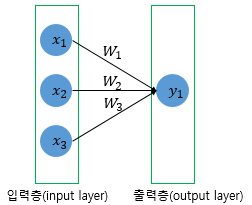

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 이전층 뉴런의 수를 알기 때문에 input_dim을 지정할 필요없음

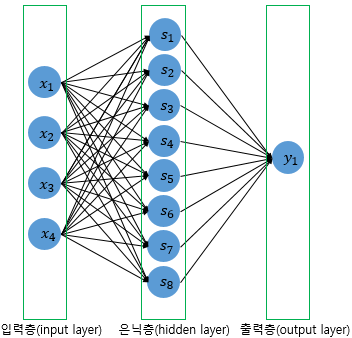

* __summary()__ : 모델의 정보를 요약해서 보여줌

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


* __compile()__ : 모델을 기계가 이해할 수 있도록 컴파일함 
 * 최적화 방법과 오차 함수, 메트릭 함수(훈련을 모니터링하기 위한 지표)를 선택

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

* __fit()__ : 모델을 학습함 
 * 학습/훈련/적합(fitting) : 모델이 오차로부터 매개 변수를 업데이트 시키는 과정
   * 첫번째 인자 = 훈련 데이터
   * 두번째 인자 = 레이블 데이터
   * epochs = 에포크(총 훈련 횟수)
   * batch_size(default = 32) = 배치 크기 
     * 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None
   * validation_data(x_val, y_val) = 검증 데이터 사용
     * 각 에포크마다 검증 데이터의 정확도도 함께 출력되는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐 __실제로 모델이 검증 데이터를 학습하지는 않음__
     * 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호임
   * validation_split= ```validation_data =``` 대신 사용할 수 있음
     * 검증 데이터를 사용하는 것은 동일하지만, 별도로 존재하는 검증 데이터를 주는 것이 아니라 X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용함
     * 마찬가지로 훈련 자체에는 반영되지 않고 훈련 과정을 지켜보기 위한 용도로 사용됨
   * verbose = 학습 중 출력되는 문구를 설정함
     * 0 : 아무 것도 출력하지 않음
     * 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줌
     * 2 : 미니 배치마다 손실 정보를 출력

```python
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
```

```python
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))
```

```python
# verbose = 1일 경우.
Epoch 88/100
7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000
```

```python
# verbose = 2일 경우.
Epoch 88/100
 - 0s - loss: 0.1475 - acc: 1.0000
```

* __evaluate()__ : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가함
 * 첫번째 인자 = 테스트 데이터
 * 두번째 인자 = 레이블 테스트 데이터
 * batch_size = 배치 크기

```python
model.evaluate(X_test, y_test, batch_size=32)
```

* __predict()__ : 임의의 입력에 대한 모델의 출력값을 확인
 * 첫번째 인자 = 예측하고자 하는 데이터.
 * batch_size = 배치 크기

```python
model.predict(X_input, batch_size=32)
```

* __save()__ : 인공 신경망 모델을 hdf5 파일에 저장

 ```python
 model.save("model_name.h5")
 ```

* __load_model()__ : 저장해둔 모델을 불러옴

```python
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")
```

## 3.2 Functional API

* Sequential API는 여러 층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일에는 한계가 있음
* Functional API을 통해 Sequential API로는 만들기 어려운 더욱 복잡한 모델을 생성할 수 있음
* Functional API는 __각 층을 일종의 함수(function)로서 정의__하고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계함

Functional API로 FFNN, RNN 등 다양한 모델을 만들면서 기존의 sequential API와의 차이 이해

__[전결합 피드 포워드 신경망(Fully-connected FFNN)]__

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# Sequential API와는 다르게 Functional API에서는 입력 데이터의 크기(shape)를 인자로 입력층을 정의해주어야 함

inputs = Input(shape=(10,)) # Input 함수에 입력 크기 정의
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output) # Model() 함수에 입력과 출력 정의

* 이전층을 다음층 함수의 입력으로 사용하고, 이를 변수에 할당함

```python
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels)
```

* Sequential API를 사용할 때와 마찬가지로 저장한 model에 ```model.compile```, ```model.fit``` 등을 사용 가능함

__[선형 회귀(Linear Regression)]__

```python
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
linear_model.fit(X, y, batch_size=1, epochs=300, shuffle=False)
```

__[로지스틱 회귀(Logistic Regression)]__

```python
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)
```

__[다중 입력을 받는 모델(model that accepts multiple inputs)]__

```python
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)
```

__[RNN(Recurrence Neural Network)]__

```python
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
inputs = Input(shape=(50,1)) # time_step(input_length) = 50, input_dim= 1
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)
```

----
```python
# 아래의 두 코드는 동일한 의미

result = Dense(128)(input)

dense = Dense(128)
result = dense(input)
``` 

## 3.3 Subclassing API

* Subclassing API로 Functional API가 구현할 수 없는 모델들을 구현할 수 있는 경우가 있음
 * Functional API는 기본적으로 딥 러닝 모델을 DAG(directed acyclic graph)로 취급함. 실제로 대부분의 딥러닝 모델이 이에 속하기는 하지만, 재귀 네트워크나 트리 RNN은 이 가정을 따르지 않으며 Functional API에서 구현할 수 없음

모델 구현 예시

__[선형 회귀(Linear Regression)]__

```python
import tensorflow as tf

class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

model = LinearRegression()
```

* 클래스(class) 형태의 모델은 tf.keras.Model을 상속받음
* init() :  모델의 구조와 동적을 정의하는 생성자를 정의
 * 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출됨
 * super() : 여기서 만든 클래스는 tf.keras.Model 클래스의 속성들을 가지고 초기화됨
* call() : 모델이 데이터를 입력받아 예측값을 리턴하는 포워드(forward) 연산을 진행시키는 함수

```python
X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

sgd = tf.keras.optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
```

---

__[세 가지 구현 방식 비교]__

1. Sequential API
* 장점 : 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단함
* 단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않음

2. Functional API
* 장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있음
* 단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 함

3. Subclassing API
* 장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능함
* 단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다로움

# 4) MLP modeling by Keras (Text classification)

## Keras Tokenizer.texts_to_matrix()

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [2]:
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


```texts_to_matrix``` : 입력된 텍스트 데이터로부터 행렬을 만듬
* mode
 * count
   * 문서단어행렬(DTM) 생성
   * 각 단어에 부여되는 인덱스는 Tokenizer를 통해 생성한 word_index 기반
 * binary
   * count 모드와 비슷하게 문서단어행렬을 생성하지만, 단어의 등장횟수는 고려하지 않고 등장 유무만 고려함
 * tfidf
   * tfidf 행렬 생성
 * freq
   * 각 문서에서의 각 단어의 등장 횟수 / 각 문서의 크기(각 문서에 등장한 모든 단어의 빈도 수의 총합)
   * 각 단어를 위와 같이 표현한 행렬 생성

In [3]:
print(t.texts_to_matrix(texts, mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [4]:
print(t.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [5]:
print(t.texts_to_matrix(texts, mode = 'tfidf'))

[[0.         0.         0.84729786 0.84729786 1.09861229 0.
  0.         0.         0.         0.        ]
 [0.         0.84729786 0.84729786 0.84729786 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.43459998 0.         0.         0.         1.09861229
  1.09861229 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.09861229 1.09861229 1.09861229]]


In [6]:
print(t.texts_to_matrix(texts, mode = 'freq'))

[[0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.25
  0.25       0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.33333333 0.33333333 0.33333333]]


## 4.1 Data Info

* 사이킷런에서 제공하는 뉴스 그룹 이메일 데이터
 * 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터

In [7]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [8]:
newsdata = fetch_20newsgroups(subset = 'train')

* subset = 
 * 'train' : 훈련 데이터 다운로드
 * 'test' : 테스트 데이터 다운로드
 * 'all' : 전체 데이터 샘플 다운로드

In [11]:
print(newsdata.keys())
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
훈련용 샘플의 개수 : 11314
총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [12]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

첫번째 샘플의 레이블 : 7
7번 레이블이 의미하는 주제 : rec.autos


훈련에 사용될 메일 본문인 data와 레이블인 target을 데이터프레임으로 만들어서 데이터에 대한 통계적인 정보들을 파악

In [13]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [15]:
# Null 값 존재 여부 확인
data.isnull().values.any()

False

In [16]:
# 중복 값 제외한 개수 확인
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


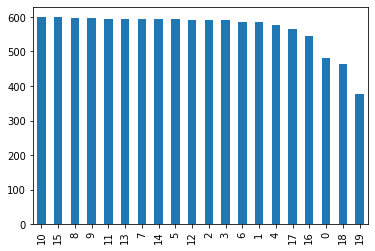

In [17]:
# 레이블 값 분포 시각화
data['target'].value_counts().plot(kind='bar');

In [18]:
# 레이블 값 분포 수치화
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


## 4.2 Data Split

In [19]:
newsdata = fetch_20newsgroups(subset = 'train')
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가

newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)

train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장

test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

## 4.3 Data Preprocessing

In [20]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [21]:
# 전처리 함수 정의
def prepare_data(train_data, test_data, mode):
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [22]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [23]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [24]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


## 4.4 Modeling by Keras

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [33]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

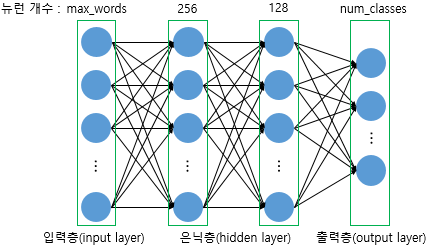

* texts_to_matrix()의 4개의 모드에 대해서 각 모델의 결과를 확인

In [34]:
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 4s 39ms/step - loss: 2.3071 - accuracy: 0.3349 - val_loss: 0.9471 - val_accuracy: 0.8392
Epoch 2/5
80/80 [==============================] - 3s 37ms/step - loss: 0.8592 - accuracy: 0.7614 - val_loss: 0.4564 - val_accuracy: 0.8843
Epoch 3/5
80/80 [==============================] - 3s 37ms/step - loss: 0.4159 - accuracy: 0.8886 - val_loss: 0.3458 - val_accuracy: 0.9117
Epoch 4/5
80/80 [==============================] - 3s 37ms/step - loss: 0.2601 - accuracy: 0.9335 - val_loss: 0.3131 - val_accuracy: 0.9117
Epoch 5/5
80/80 [==============================] - 3s 37ms/step - loss: 0.1696 - accuracy: 0.9623 - val_loss: 0.2976 - val_accuracy: 0.9152
binary 모드의 테스트 정확도: 0.8222251534461975
Epoch 1/5
80/80 [==============================] - 3s 38ms/step - loss: 2.7030 - accuracy: 0.2413 - val_loss: 1.6411 - val_accuracy: 0.7544
Epoch 2/5
80/80 [==============================] - 3s 37ms/step - loss: 1.3770 - accuracy: 0.6426 - val_loss: 0.6782 - va

* binary 모드의 테스트 정확도: 0.8312533
* count 모드의 테스트 정확도: 0.8239511
* tfidf 모드의 테스트 정확도: 0.8381572
* freq 모드의 테스트 정확도: 0.6902549